In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df= pd.read_csv("all_penguins_clean.csv", index_col=0)
df.dropna(inplace=True) # quick solve for NaN error in m.fit below
df.shape

(334, 14)

In [5]:
X = df[["Culmen Length (mm)", 'Culmen Depth (mm)']]
y = df["Species"]

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

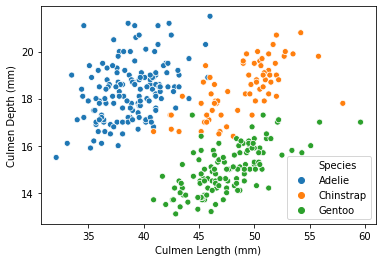

In [6]:
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y)

In [10]:
predictions = [] #one prediction for every penguin
for i, row in X.iterrows(): #i = index, row = row, goes through values of row as pd Series
    if row['Culmen Length (mm)'] < 43 :
        if row ['Culmen Depth (mm)'] > 15:
            predictions.append('Adelie')
        else:
            predictions.append('Gentoo')
    else:
        if row['Culmen Depth (mm)'] <= 17:
            predictions.append('Gentoo')
        else:
            predictions.append('Chinstrap')

In [12]:
from sklearn.metrics import accuracy_score

round(accuracy_score(predictions, y), 3)

0.931

## This is called the **CART** algorithm:
* finds out which `if` statements give the best separations
* it is a **divide-and-conquer** algorithm
* it is a **greedy** algorithm
* as a metric, it uses the GINI purity score:

    $ GINI = \sum(p*(1-p_i)) $
    
 $p$ = proportion of points in a given data

If you have an optimal split, GINI = 0

The worst split will be GINI = 0.5 (with two classes)

# With `scikit-learn`:

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=42)

In [50]:
m = DecisionTreeClassifier(max_depth=2) # we use the max depth parameter - how deep is the tree (=how many qs)?
m.fit(Xtrain, ytrain)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
f"Training Accuracy: {round(m.score(Xtrain,ytrain),3)}"

'Training Accuracy: 0.958'

In [52]:
f"Test Accuracy: {round(m.score(Xtest,ytest),3)}"

'Test Accuracy: 0.904'

# Is your model overfitting?
* training accuracy > test_accuracy --> OVERFITTING
    * the error rates cannot differ by much: training error 0% and test error 8% is a massive difference!
* training accuracy ~= test accuracy ---> GOOD
* trainig accuracy ~= test accuracy **and** both are low ---> UNDERFITTING, BAD

# Decision trees overfit very easily!!!

# This is where RANDOM FOREST comes in:

In [55]:
# We make a copy of the X df and add the y vals as a column to it:
df2 = Xtrain.copy()
df2['y'] = ytrain
df2.head()

,Culmen Length (mm),Culmen Depth (mm),y
studyName,,,
PAL0708,46.0,18.9,Chinstrap
PAL0708,49.2,15.2,Gentoo
PAL0708,40.3,18.0,Adelie
PAL0910,37.7,19.8,Adelie
PAL0809,49.5,19.0,Chinstrap


### We wish to create a *Model Ensemble*:
* many models working together to get a better prediction
* forest = many trees
* all the models need to be slightly different
* **random forest** - every tree uses different data points

In [94]:
trees = []

for i in range(10): # we train ten trees
#Select 50 penguins randomly
    sample = df2.sample(50)
    Xsample = sample[['Culmen Length (mm)', 'Culmen Depth (mm)']]
    ysample = sample['y']

    m=DecisionTreeClassifier(max_depth = 2)
    m.fit(Xsample, ysample)
    trees.append(m)
    print ("test ", round(m.score(Xtest,ytest), 3))


test  0.874
test  0.898
test  0.904
test  0.886
test  0.898
test  0.904
test  0.898
test  0.88
test  0.904
test  0.862


In [95]:
predictions = []
for t in trees:
    ypred = t.predict(Xtest)
    predictions.append(ypred)
# Every tree makes a predicition
# Outputs a list of arrays of predictions

In [96]:
pdf = pd.DataFrame(predictions)
pdf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,Adelie,Gentoo,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
1,Adelie,Gentoo,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
2,Adelie,Gentoo,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
3,Adelie,Gentoo,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
4,Adelie,Gentoo,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
5,Adelie,Gentoo,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
6,Adelie,Gentoo,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
7,Adelie,Gentoo,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Adelie,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
8,Adelie,Gentoo,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
9,Adelie,Gentoo,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Adelie,Gentoo,Gentoo


### We have ten predictions for each penguin - take the modal value 

In [97]:
yfinal = pdf.mode().head(1).values[0]

In [99]:
round(accuracy_score(yfinal, ytest), 3)

0.904

### This is slightly more accurate than the individual random trees - which were at about ~0.88

# With `scikit`

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
m = RandomForestClassifier(n_estimators=10, max_depth=2)
m.fit(Xtrain, ytrain)
m.score(Xtrain, ytrain)

0.9580838323353293

In [122]:
m.score(Xtest, ytest)

0.8982035928143712

# Pros and Cons of different models

## Logistic Regression
* pros: 
    * good for binary decisions
    * transparent, explainable
    * output is a probability - more nuanced 
    * super fast
* multiple classes combining multiple models (one-versus-all, **OvA**) 
* usually requires feature engineering
* decision boundaries are linear

## Decision Tree
* con: overfits easily - random forest better
* no probability
* pros: 
    * easy to plot, transparent
    * don't need much feature engineering
* nonlinear decision boundaries

## Random Forest
* con: not transparent/ black box model (cannot trace how a decision was made)
* pros: 
    * very powerful
    * work with very complex data
    * not much feature engineering
    * super easy to use - good baseline
* pseudo-probability
* nonlinear decision boundaries